In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("../data/spam_clean.csv")
df.head()


,Category,Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


In [15]:
df = df.dropna()
df = df[df["Message"].str.strip() != ""]


In [16]:
X = df["Message"]
y = df["Category"]


In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
X_train.isna().sum()


np.int64(0)

In [20]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [21]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}


In [22]:
results = {}

for name, model in models.items():
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)
    
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "report": classification_report(y_test, y_pred, output_dict=True),
        "confusion": confusion_matrix(y_test, y_pred)
    }


In [23]:
for name, res in results.items():
    print(f"\n🔹 {name}")
    print("Accuracy :", res["accuracy"])



🔹 Naive Bayes
Accuracy : 0.9658580413297394

🔹 Logistic Regression
Accuracy : 0.9667565139263252

🔹 Linear SVM
Accuracy : 0.9829290206648698


In [25]:
best_model_name = max(results, key=lambda x: results[x]["accuracy"])
best_model_name

'Linear SVM'

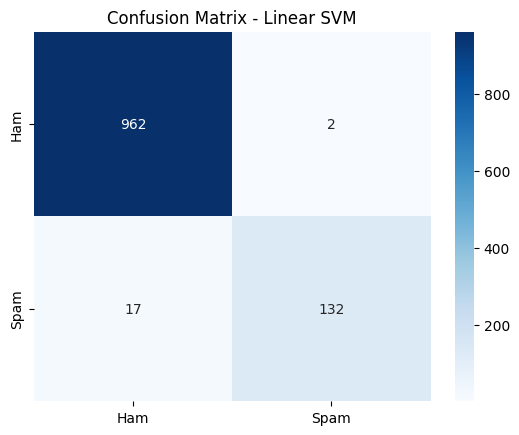

In [26]:
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_vect)

sns.heatmap(
    confusion_matrix(y_test, y_pred_best),
    annot=True, fmt="d", cmap="Blues",
    xticklabels=["Ham", "Spam"],
    yticklabels=["Ham", "Spam"]
)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


In [28]:
import pickle

with open("../models/spam_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("../models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print(" Meilleur modèle sauvegardé :", best_model_name)


 Meilleur modèle sauvegardé : Linear SVM


## Conclusion de la modélisation
- Trois modèles ont été entraînés
- Le meilleur modèle a été sélectionné selon l'accuracy
- Le modèle final et le vectorizer ont été sauvegardés
- Le système est prêt pour le déploiement

➡️ Prochaine étape : **Script train.py + Application Streamlit**
